### Chapter 4.1 - Titanic (1/2)

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 

import warnings 
warnings.filterwarnings('ignore')

In [2]:
df_train = pd.read_csv('data/titanic_train.csv')
df_test = pd.read_csv('data/titanic_test.csv')

print(df_train.shape)
print(df_test.shape)
#df_train.head()
df_test.head()

(916, 13)
(393, 13)


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,body,home.dest
0,3,0,"Rekic, Mr. Tido",male,38.0,0,0,349249,7.8958,NaN,S,NaN,NaN
1,2,1,"Phillips, Miss. Alice Frances Louisa",female,21.0,0,1,S.O./P.P. 2,21.0000,NaN,S,NaN,"Ilfracombe, Devon"
2,2,0,"Jacobsohn, Mr. Sidney Samuel",male,42.0,1,0,243847,27.0000,NaN,S,NaN,London
3,3,0,"Risien, Mr. Samuel Beard",male,NaN,0,0,364498,14.5000,NaN,S,NaN,NaN
4,2,0,"Denbury, Mr. Herbert",male,25.0,0,0,C.A. 31029,31.5000,NaN,S,NaN,"Guernsey / Elizabeth, NJ"


In [3]:
## 불필요한 컬럼 제거 
df_train = df_train.drop(['name', 'ticket', 'body', 'cabin', 'home.dest'], axis = 1)
df_test = df_test.drop(['name', 'ticket', 'body', 'cabin', 'home.dest'], axis = 1)

df_train.head()

,pclass,survived,sex,age,sibsp,parch,fare,embarked
0,2,1,female,13.0,0,1,19.5000,S
1,2,1,female,4.0,1,1,23.0000,S
2,2,1,female,30.0,1,0,13.8583,C
3,3,0,male,NaN,0,0,7.7250,Q
4,3,1,female,22.0,0,0,7.7250,Q


### Step 1. EDA - 생존에 영향을 미친 변수들을 탐색해보자 

0    563
1    353
Name: survived, dtype: int64


<AxesSubplot:>

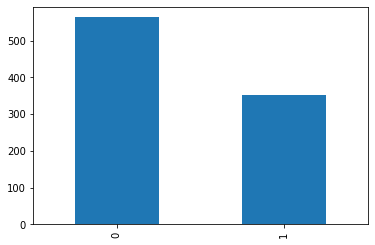

In [4]:
## 1. 사망 = 0, 생존 = 1 의 분포는?  
print(df_train['survived'].value_counts())
df_train['survived'].value_counts().plot.bar()

male      581
female    335
Name: sex, dtype: int64


<AxesSubplot:xlabel='sex', ylabel='count'>

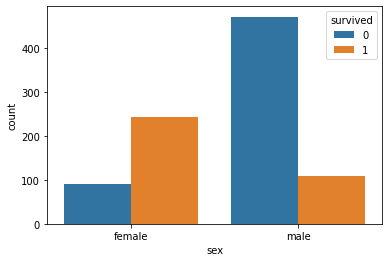

In [5]:
## 2. 성별 사망/생존 비교 
print(df_train['sex'].value_counts())
sns.countplot(data=df_train, x = 'sex', hue = 'survived')

3    498
1    230
2    188
Name: pclass, dtype: int64


<AxesSubplot:xlabel='pclass', ylabel='count'>

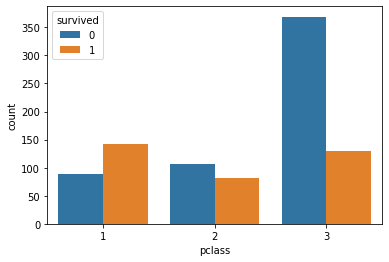

In [6]:
## 3. 좌석등급별 사망/생존 비교 
print(df_train['pclass'].value_counts())
sns.countplot(data=df_train, x = 'pclass', hue = 'survived')

S    652
C    179
Q     83
Name: embarked, dtype: int64


<AxesSubplot:xlabel='embarked', ylabel='count'>

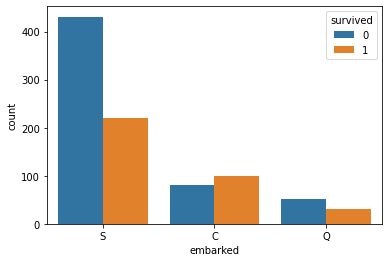

In [7]:
## 4. 출발지별 사망/생존 비교 
print(df_train['embarked'].value_counts())
sns.countplot(data=df_train, x = 'embarked', hue = 'survived')

In [8]:
## Extra : Auto EDA fucntion
from scipy import stats

def valid_features(df, col_name, distribution_check = True) : 
    
    ## 사망/생존 분포 그래프 출력 
    g = sns.FacetGrid(df, col = 'survived')  
    g.map(plt.hist, col_name, bins = 30)
    
    ## 사망/생존 집단의 표준편차 출력 
    titanic_survived = df[df['survived'] ==1]
    titanic_survived_static = np.array(titanic_survived[col_name])
    print('Std_survived =', '%.2f' % np.std(titanic_survived_static) )
    
    titanic_unsurvived = df[df['survived'] ==0]
    titanic_unsurvived_static = np.array(titanic_unsurvived[col_name])
    print('Std_unsurvived =', '%.2f' % np.std(titanic_unsurvived_static) )
    
    ## 사망/생존 그룹간 T-test 
    tTestResult = stats.ttest_ind(titanic_survived[col_name], titanic_unsurvived[col_name])
    tTestResultDiffVar = stats.ttest_ind(titanic_survived[col_name], titanic_unsurvived[col_name], equal_var=False)
    print("The t-statistic and p-value assuming equal variances is %.3f and %.3f." % tTestResult)
    print("The t-statistic and p-value not assuming equal variances is %.3f and %.3f" % tTestResultDiffVar)
    
    ## 분포의 정규성 검정(Shapiro-Wilk) 
    if distribution_check:
    
        print("The w-statistic and p-value in Survived %.3f and %.3f" % stats.shapiro(titanic_survived[col_name]))
        print("The w-statistic and p-value in Non-Survived %.3f and %.3f" % stats.shapiro(titanic_unsurvived[col_name]))

Std_survived = 14.22
Std_unsurvived = 13.71
The t-statistic and p-value assuming equal variances is -0.546 and 0.585.
The t-statistic and p-value not assuming equal variances is -0.543 and 0.587
The w-statistic and p-value in Survived 0.982 and 0.001
The w-statistic and p-value in Non-Survived 0.968 and 0.000


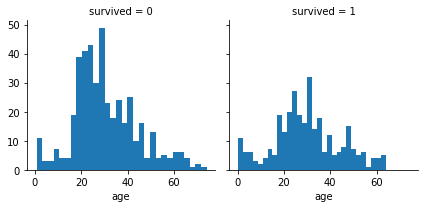

In [9]:
## age에서 0을 제거해 줘야 한다. 
valid_features(df_train[df_train['age'] >0], 'age', distribution_check = True)

Std_survived = 0.64
Std_unsurvived = 1.34
The t-statistic and p-value assuming equal variances is -2.118 and 0.034.
The t-statistic and p-value not assuming equal variances is -2.446 and 0.015
The w-statistic and p-value in Survived 0.656 and 0.000
The w-statistic and p-value in Non-Survived 0.492 and 0.000


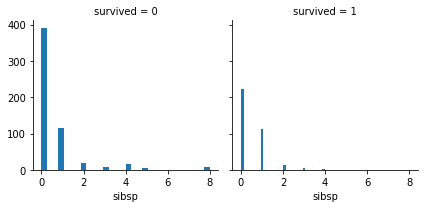

In [10]:
valid_features(df_train, 'sibsp', distribution_check = True)

Std_survived = 0.74
Std_unsurvived = 0.89
The t-statistic and p-value assuming equal variances is 1.865 and 0.063.
The t-statistic and p-value not assuming equal variances is 1.942 and 0.052
The w-statistic and p-value in Survived 0.630 and 0.000
The w-statistic and p-value in Non-Survived 0.421 and 0.000


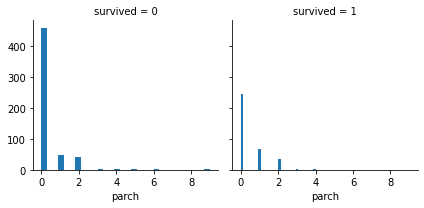

In [11]:
valid_features(df_train, 'parch', distribution_check = True)

Std_survived = 60.68
Std_unsurvived = 33.65
The t-statistic and p-value assuming equal variances is 7.523 and 0.000.
The t-statistic and p-value not assuming equal variances is 6.657 and 0.000
The w-statistic and p-value in Survived 0.660 and 0.000
The w-statistic and p-value in Non-Survived 0.520 and 0.000


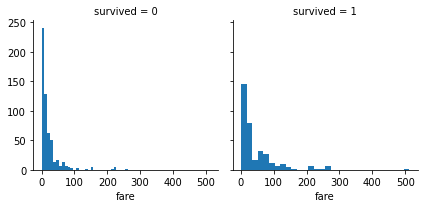

In [12]:
valid_features(df_train, 'fare', distribution_check = True)

In [13]:
'''
1. 성별과 좌석등급에 따른 생존율 차이는 확연히 존재
2. 출항지에 따른 생존율 차이는 불확실 (S에서만 차이가 나타나는 듯) 
3. 요금(fare)는 생존율에 유의미한 영향을 미친 듯
4. 반면 연령(age)는 거의 영향을 미치지 못하였으며, sibsp, parch는 애매함 
'''

'\n1. 성별과 좌석등급에 따른 생존율 차이는 확연히 존재\n2. 출항지에 따른 생존율 차이는 불확실 (S에서만 차이가 나타나는 듯) \n3. 요금(fare)는 생존율에 유의미한 영향을 미친 듯\n4. 반면 연령(age)는 거의 영향을 미치지 못하였으며, sibsp, parch는 애매함 \n'

### Step 2-1. Logistic Regression

In [14]:
## 결측값 제거 
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 916 entries, 0 to 915
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    916 non-null    int64  
 1   survived  916 non-null    int64  
 2   sex       916 non-null    object 
 3   age       741 non-null    float64
 4   sibsp     916 non-null    int64  
 5   parch     916 non-null    int64  
 6   fare      916 non-null    float64
 7   embarked  914 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 57.4+ KB


In [15]:
## age의 결측값은 평균으로, embark의 결측값은 최빈값으로 대체 
replace_mean = df_train[df_train['age']>0]['age'].mean()
df_train['age'] = df_train['age'].fillna(replace_mean)
df_test['age'] = df_test['age'].fillna(replace_mean)

embarked_mode = df_train['embarked'].value_counts().index[0]
df_train['embarked'] = df_train['embarked'].fillna(embarked_mode)
df_test['embarked'] = df_test['embarked'].fillna(embarked_mode)

In [16]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 916 entries, 0 to 915
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    916 non-null    int64  
 1   survived  916 non-null    int64  
 2   sex       916 non-null    object 
 3   age       916 non-null    float64
 4   sibsp     916 non-null    int64  
 5   parch     916 non-null    int64  
 6   fare      916 non-null    float64
 7   embarked  916 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 57.4+ KB


In [17]:
## One-hot incoding for Losistic Regression 

whole_df = df_train.append(df_test)
train_idx_num = len(df_train)
whole_df_encoded = pd.get_dummies(whole_df)

df_train = whole_df_encoded[:train_idx_num]
df_test = whole_df_encoded[train_idx_num:]

df_train.head()

,pclass,survived,age,sibsp,parch,fare,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
0,2,1,13.000000,0,1,19.5000,1,0,0,0,1
1,2,1,4.000000,1,1,23.0000,1,0,0,0,1
2,2,1,30.000000,1,0,13.8583,1,0,1,0,0
3,3,0,30.231444,0,0,7.7250,0,1,0,1,0
4,3,1,22.000000,0,0,7.7250,1,0,0,1,0


In [18]:
## Logistic model training 
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [25]:
## split the dataset 
x_train, y_train = df_train.loc[:, df_train.columns != 'survived'].values, df_train['survived'].values
x_test, y_test = df_test.loc[:, df_test.columns != 'survived'].values, df_test['survived'].values

## training 
lr = LogisticRegression(random_state = 0)
lr.fit(x_train, y_train)

## return the results of training 
y_pred = lr.predict(x_test)
y_pred_probability = lr.predict_proba(x_test)[:,1]

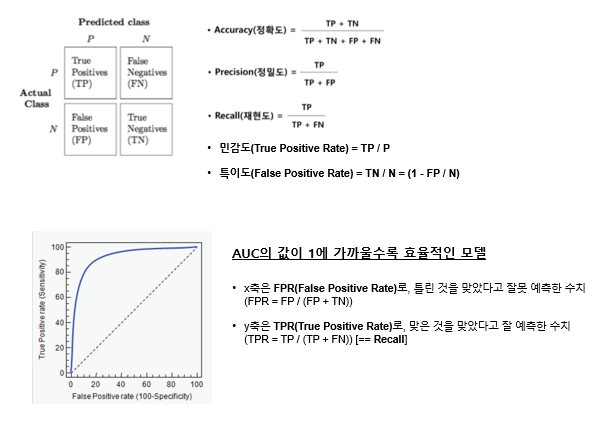

In [26]:
from IPython.display import Image
Image('img/validation.PNG')

In [31]:
from sklearn.metrics import confusion_matrix

# Confusion Matrix를 출력합니다.
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print(confmat)

print('-----------------------------------------------------------')
print("accuracy: %.2f" % accuracy_score(y_test, y_pred))
print("Precision : %.3f" % precision_score(y_test, y_pred))
print("Recall : %.3f" % recall_score(y_test, y_pred))
print("F1 : %.3f" % f1_score(y_test, y_pred))

[[214  32]
 [ 48  99]]
-----------------------------------------------------------
accuracy: 0.80
Precision : 0.756
Recall : 0.673
F1 : 0.712


AUC : 0.838


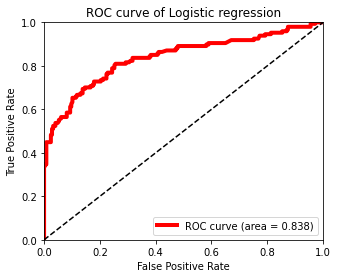

In [32]:
from sklearn.metrics import roc_curve, roc_auc_score

# AUC (Area Under the Curve)를 계산하여 출력합니다.
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_probability)
roc_auc = roc_auc_score(y_test, y_pred_probability)
print("AUC : %.3f" % roc_auc)

# ROC curve를 그래프로 출력합니다.
plt.rcParams['figure.figsize'] = [5, 4]
plt.plot(false_positive_rate, true_positive_rate, label='ROC curve (area = %0.3f)' % roc_auc, color='red', linewidth=4.0)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve of Logistic regression')
plt.legend(loc="lower right")

### Step 2-2. Decision Tree

In [33]:
from sklearn.tree import DecisionTreeClassifier

# 의사결정나무를 학습하고, 학습한 모델로 테스트 데이터셋에 대한 예측값을 반환합니다.
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)
y_pred = dtc.predict(x_test)
y_pred_probability = dtc.predict_proba(x_test)[:,1]

# 학습한 모델의 성능을 계산하여 출력합니다.
print("accuracy: %.2f" % accuracy_score(y_test, y_pred))
print("Precision : %.3f" % precision_score(y_test, y_pred))
print("Recall : %.3f" % recall_score(y_test, y_pred))
print("F1 : %.3f" % f1_score(y_test, y_pred))

accuracy: 0.75
Precision : 0.679
Recall : 0.633
F1 : 0.655


AUC : 0.741


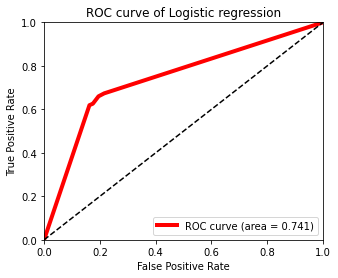

In [34]:
# 학습한 모델의 AUC를 계산하여 출력합니다.
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_probability)
roc_auc = roc_auc_score(y_test, y_pred_probability)
print("AUC : %.3f" % roc_auc)

# ROC curve를 그래프로 출력합니다.
plt.rcParams['figure.figsize'] = [5, 4]
plt.plot(false_positive_rate, true_positive_rate, label='ROC curve (area = %0.3f)' % roc_auc, 
         color='red', linewidth=4.0)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve of Logistic regression')
plt.legend(loc="lower right")